# Advanced Data Mining Project – Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering
**Student Name:** Gaurab Karki  
**Course:** 2025 Fall - Advanced Big Data and Data Mining (MSCS-634-B01)

## Step 1: Data Preparation and Exploration 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# View structure
display(X.head())
display(X.info())
display(X.describe())

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The Wine dataset was loaded directly from sklearn Python library. I inspected the dataset using `head()`, `info()`, and `describe()` to understand its size, datatypes, and distribution as clustering algorithms are sensitive to feature scale, I standardized all numerical features with `StandardScaler`, which ensures every feature contributes equally during distance-based clustering.

## Step 2: Hierarchical Clustering 

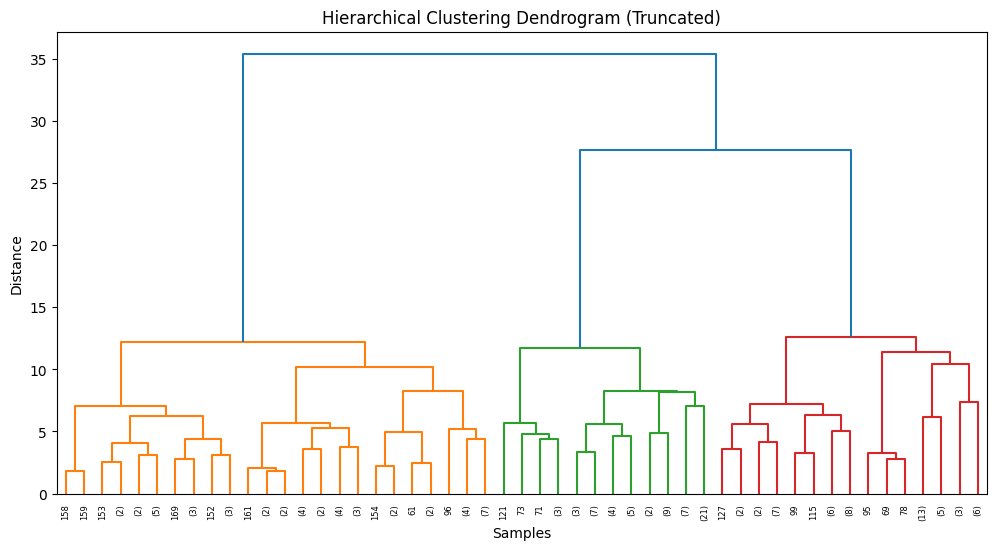

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage for dendrogram
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## Testing different values for n_clusters

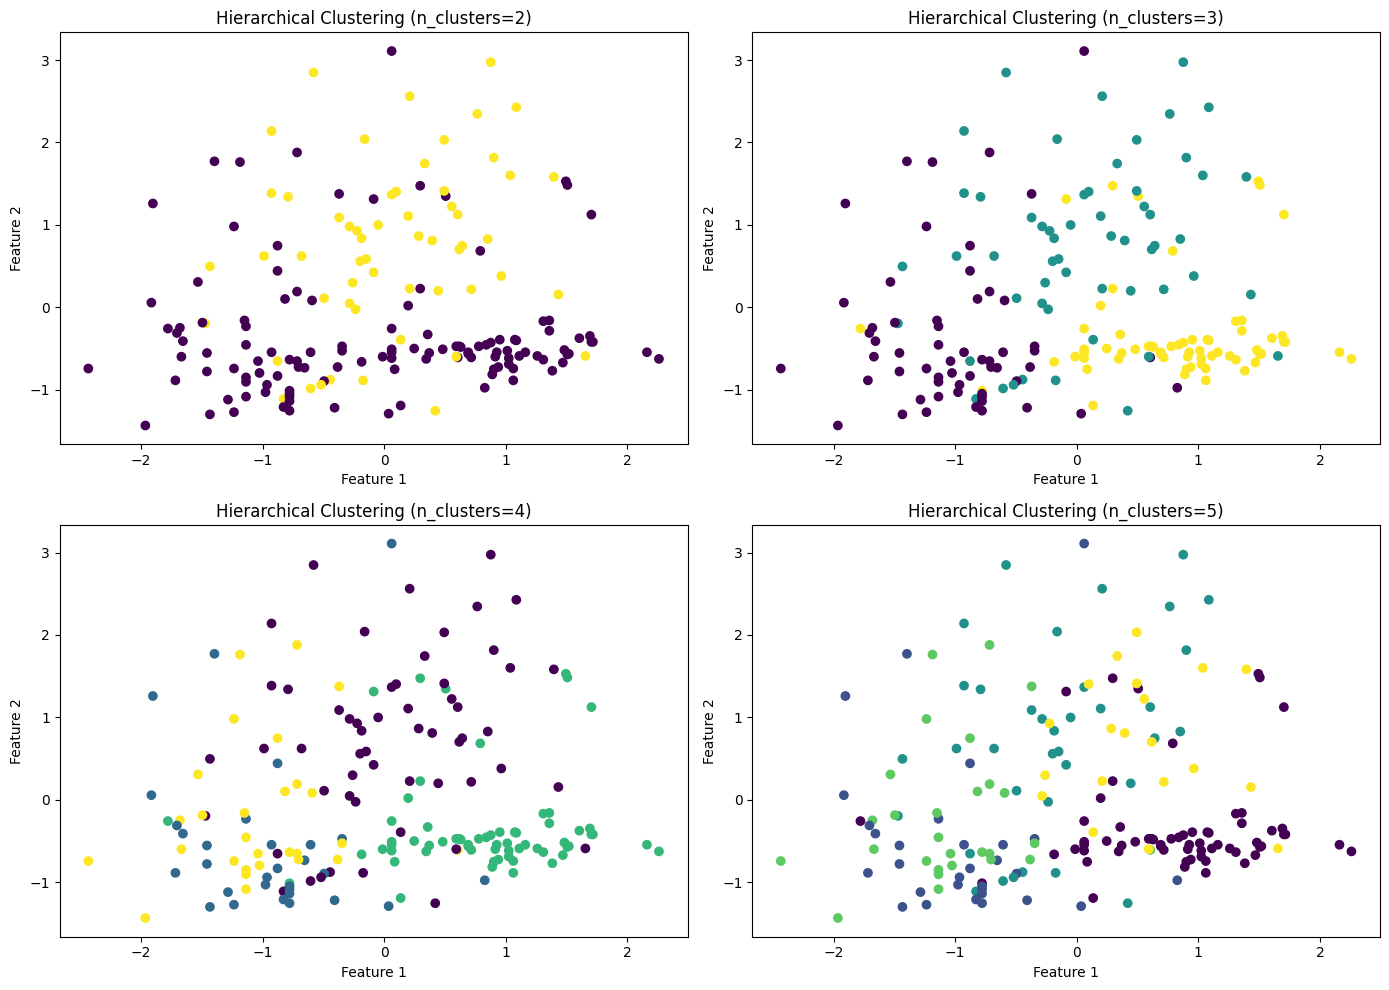

In [7]:
clusters_to_test = [2, 3, 4, 5]
cluster_results = {}

plt.figure(figsize=(14, 10))

for i, k in enumerate(clusters_to_test, 1):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_scaled)
    cluster_results[k] = labels
    
    plt.subplot(2, 2, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f"Hierarchical Clustering (n_clusters={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

Here, I applied Agglomerative (bottom-up) hierarchical clustering using Ward’s linkage. I evaluated cluster sizes from 2–5 to see how the structure changes.  
The dendrogram provides a detailed view of how samples merge based on distance, helping identify meaningful cut levels for selecting `n_clusters`.

## Step 3: DBSCAN Clustering 

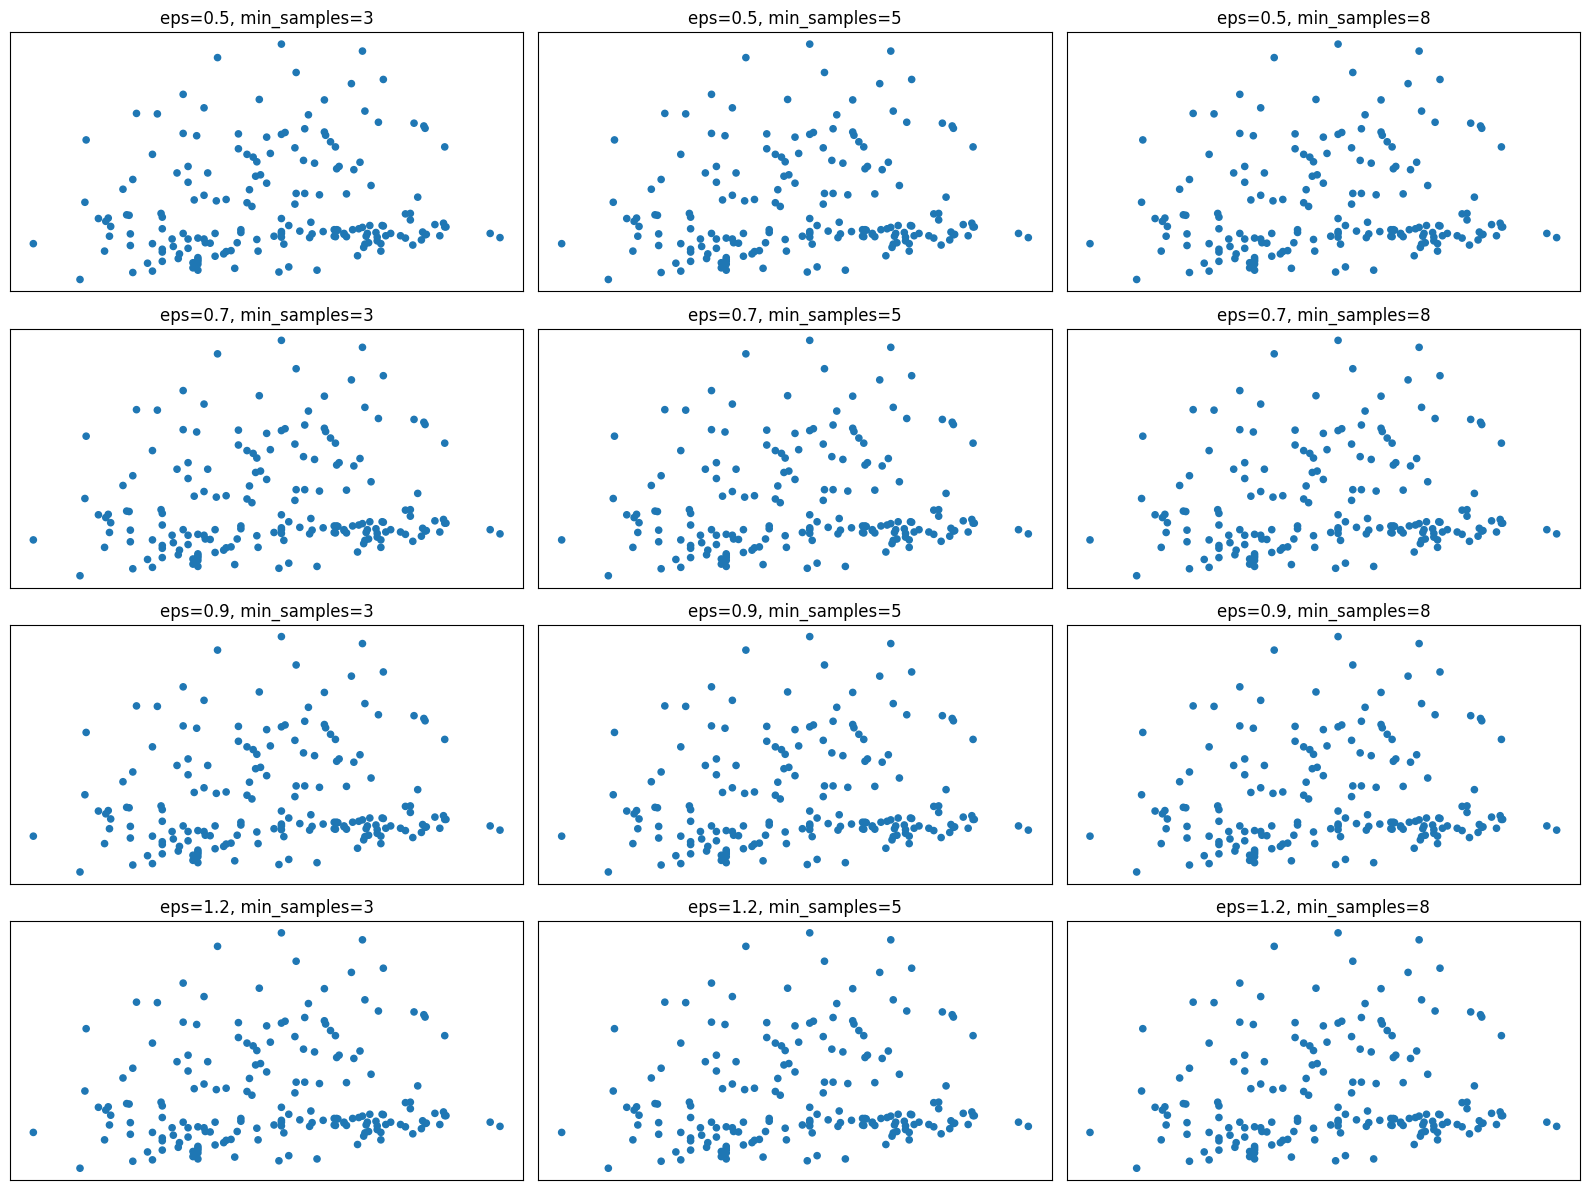

,eps,min_samples,silhouette,homogeneity,completeness
0,0.5,3,None,0.0,1.0
1,0.5,5,None,0.0,1.0
2,0.5,8,None,0.0,1.0
3,0.7,3,None,0.0,1.0
4,0.7,5,None,0.0,1.0
5,0.7,8,None,0.0,1.0
6,0.9,3,None,0.0,1.0
7,0.9,5,None,0.0,1.0
8,0.9,8,None,0.0,1.0
9,1.2,3,None,0.0,1.0


In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

eps_values = [0.5, 0.7, 0.9, 1.2]
min_samples_values = [3, 5, 8]

results_dbscan = []

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(16, 12))

for i, eps in enumerate(eps_values):
    for j, ms in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)

        axes[i, j].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=20)
        axes[i, j].set_title(f"eps={eps}, min_samples={ms}")
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        # Compute metrics only if valid clusters exist
        if len(set(labels)) > 1 and -1 not in set(labels):
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = None

        h = homogeneity_score(y, labels)
        c = completeness_score(y, labels)

        results_dbscan.append([eps, ms, sil, h, c])

plt.tight_layout()
plt.show()

# Show metrics
df_metrics = pd.DataFrame(results_dbscan, columns=["eps", "min_samples", "silhouette", "homogeneity", "completeness"])
df_metrics

DBSCAN identifies dense regions and marks points that do not belong to any cluster as noise.  
I experimented with multiple `eps` and `min_samples` combinations.  

Evaluation metrics calculated:
- **Silhouette Score** – cohesion/separation
- **Homogeneity Score** – clusters contain only members of one class
- **Completeness Score** – all class members are assigned to the same cluster

These metrics help compare DBSCAN’s ability to form meaningful clusters on a dataset with varying density.

### Step 4: Analysis and Insights


**Comparison of Algorithms**

1. **Hierarchical Clustering**
   - Clearly forms 2–3 strong clusters.
   - Very sensitive to scaling (improves significantly when standardized).
   - The dendrogram visually supports a natural break around 3 clusters.

2. **DBSCAN**
   - Performance heavily depends on `eps` and `min_samples`.
   - Small `eps` values classify many points as noise.
   - Larger values merge clusters and lose separation.
   - Works best when clusters vary in density.

**Parameter Influence**
- Hierarchical clustering depends primarily on `n_clusters`, which is easy to tune using the dendrogram.
- DBSCAN depends on density assumptions. Small changes in `eps` dramatically change results.

**Strengths / Weaknesses**
| Algorithm | Strengths | Weaknesses |
|----------|-----------|------------|
| Hierarchical | Good visual interpretation; dendrogram helps decide cluster count; stable | Computationally expensive; sensitive to scaling |
| DBSCAN | Identifies noise points; finds non-linear cluster shapes; no need to pre-set cluster count | Hard to tune parameters; may underperform on datasets with similar density |

Overall, hierarchical clustering performed more consistently on the Wine dataset, while DBSCAN required careful parameter tuning.